# Web Scraping Project

### Introduction

Marijuana strain data for this project was scraped from [Leafly](https://www.leafly.com/). Approximately 3,200 marijuana strains were scraped with data in 19 columns. Additionally, Leafly partners with labs to test their marijuana. However, they also rely on user information for ratings, effects, flavors, and potency.

### Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Settings to adjust plots

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [3]:
df = pd.read_csv('./canna/strain_data_v2.csv')

In [4]:
df.shape

(3242, 19)

In [5]:
df.sample(10).sort_index().T

,20,439,532,664,763,1221,1557,2606,2922,3184
calm_vs_ener,--position:43.90937725490281%,NaN,NaN,NaN,NaN,NaN,NaN,--position:67.90923129557282%,--position:19.381406032393155%,--position:28.62945609453511%
cbd_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_1,Ultra Banana,NaN,NaN,NaN,NaN,NaN,NaN,Budzilla,NaN,NaN
child_2,Banana Diesel,NaN,NaN,NaN,NaN,NaN,NaN,Lavender Haze,NaN,NaN
eff_pct,"50,%,48,%,44,%,38,%,26,%,35,%,27,%,25,%,22,%,1...",NaN,NaN,NaN,NaN,NaN,NaN,"66,%,65,%,49,%,46,%,34,%,42,%,35,%,27,%,26,%,1...","74,%,37,%,37,%,33,%,22,%,44,%,44,%,37,%,33,%,2...","71,%,50,%,44,%,44,%,35,%,35,%,29,%,24,%,21,%,1..."
effects,"Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Creati...",NaN,NaN,NaN,NaN,NaN,NaN,"Euphoric, ,Happy, ,Relaxed, ,Uplifted, ,Energe...","Relaxed, ,Uplifted, ,Happy, ,Euphoric, ,Focuse...","Relaxed, ,Happy, ,Uplifted, ,Euphoric, ,Hungry..."
grow_all,"Moderate,30 - 78,3 - 6,7 - 9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_rate_rvws,1049,3,2,8,3,12,7,197,34,232
n_reported_effects,744 people reported 5044 effects,NaN,NaN,NaN,NaN,NaN,NaN,141 people reported 1167 effects,27 people reported 220 effects,137 people reported 997 effects
parent_1,Skunk Haze,NaN,NaN,Apollo 11,Querkle,NaN,White Fire 43,Haze,Harlequin,NaN


In [6]:
df.dtypes

calm_vs_ener           object
cbd_pct               float64
child_1                object
child_2                object
eff_pct                object
effects                object
grow_all               object
n_rate_rvws           float64
n_reported_effects     object
parent_1               object
parent_2               object
pop_loc                object
prim_type              object
rating                float64
strain                 object
terp_bar_pct           object
terp_descrip           object
terpenes               object
thc_pct               float64
dtype: object

In [7]:
df.isnull().sum()

calm_vs_ener          1737
cbd_pct               3216
child_1               2995
child_2               2995
eff_pct               2004
effects               2004
grow_all              3079
n_rate_rvws            308
n_reported_effects    2004
parent_1              1511
parent_2              1511
pop_loc                666
prim_type                0
rating                 308
strain                   0
terp_bar_pct          2847
terp_descrip          2847
terpenes              2847
thc_pct               2432
dtype: int64

In [8]:
df_copy = df.copy()

In [9]:
df_copy['calm_vs_ener'] = df_copy['calm_vs_ener'].str.replace('[a-zA-Z-%:]','',regex=True).astype('float64')
df_copy['calm_vs_ener']

0       55.710916
1       68.579642
2       89.466798
3       88.415222
4       97.690063
          ...    
3237    57.276062
3238    33.656710
3239    94.107765
3240    41.576603
3241    72.894438
Name: calm_vs_ener, Length: 3242, dtype: float64

In [10]:
df_copy = df_copy.join(df_copy['eff_pct'].str.split(',%,', expand=True))

In [11]:
df_copy

,calm_vs_ener,cbd_pct,child_1,child_2,eff_pct,effects,grow_all,n_rate_rvws,n_reported_effects,parent_1,...,5,6,7,8,9,10,11,12,13,14
0,55.710916,NaN,Cherry Sauce,Alf,"59,%,59,%,51,%,44,%,30,%,36,%,28,%,24,%,23,%,1...","Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Creati...","Moderate,30 - 78,3 - 6,7 - 9",1811.0,1209 people reported 8899 effects,Durban Poison,...,36,28,24,23,14,27,15,6,4,"4,%"
1,68.579642,NaN,Travel Joint,El Perro,"63,%,56,%,50,%,48,%,33,%,30,%,27,%,23,%,18,%,1...","Happy, ,Relaxed, ,Euphoric, ,Uplifted, ,Focuse...",NaN,541.0,386 people reported 2899 effects,Tres Dawg,...,30,27,23,18,15,31,14,10,4,"2,%"
2,89.466798,NaN,Lemon Ice,Lemon Cookies,"67,%,54,%,53,%,46,%,43,%,34,%,27,%,24,%,19,%,1...","Happy, ,Uplifted, ,Euphoric, ,Energetic, ,Rela...","Moderate,30 - 78,1 - 3,10 - 12",2271.0,1582 people reported 12309 effects,Silver Haze,...,34,27,24,19,11,38,19,10,10,"6,%"
3,88.415222,NaN,Amnesia White,Monster Profit,"70,%,64,%,58,%,45,%,45,%,37,%,31,%,25,%,23,%,1...","Happy, ,Euphoric, ,Uplifted, ,Energetic, ,Crea...","Moderate,30 - 78,3 - 6,10 - 12",1389.0,1011 people reported 8816 effects,South Asian Indica,...,37,31,25,23,14,42,22,15,13,"6,%"
4,97.690063,NaN,DJ Andy Williams,Lemonder,"56,%,55,%,55,%,50,%,42,%,35,%,27,%,25,%,18,%,1...","Happy, ,Uplifted, ,Energetic, ,Euphoric, ,Crea...","Moderate,> 78,1 - 3,10 - 12",2021.0,1465 people reported 10581 effects,Lemon Skunk,...,35,27,25,18,16,29,17,8,6,"6,%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,57.276062,NaN,Kid N' Kookies,The Big Dirty,"62,%,59,%,54,%,47,%,35,%,36,%,28,%,27,%,27,%,1...","Happy, ,Relaxed, ,Euphoric, ,Uplifted, ,Creati...","Moderate,< 30,0.5 - 1,7 - 9",6956.0,4515 people reported 35650 effects,Durban Poison,...,36,28,27,27,14,27,14,5,5,"4,%"
3238,33.656710,NaN,NaN,NaN,"66,%,58,%,46,%,40,%,24,%,26,%,20,%,17,%,17,%,1...","Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Hungry...",NaN,908.0,620 people reported 3994 effects,NaN,...,26,20,17,17,11,21,10,6,3,"2,%"
3239,94.107765,NaN,Diesel Duff,Champagne Diesel,"62,%,54,%,54,%,50,%,43,%,38,%,29,%,28,%,24,%,1...","Happy, ,Uplifted, ,Euphoric, ,Energetic, ,Crea...","Moderate,> 78,1 - 3,10 - 12",7571.0,5086 people reported 40754 effects,Chemdog 91,...,38,29,28,24,13,35,19,10,8,"5,%"
3240,41.576603,NaN,The Bling,VVS Chem,"59,%,54,%,51,%,41,%,29,%,29,%,24,%,24,%,20,%,1...","Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Creati...",NaN,1508.0,993 people reported 6909 effects,Thin Mint GSC,...,29,24,24,20,12,25,12,5,4,"4,%"


In [12]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'eff_pct',
 'effects',
 'grow_all',
 'n_rate_rvws',
 'n_reported_effects',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid'] 

In [13]:
#df_copy.paranoid = df_copy.paranoid.str.replace('[,%]','',regex=True)

df_copy.loc[:,'relaxed':'paranoid'] = df_copy.loc[:,'relaxed':'paranoid'].replace('[,%]','',regex=True).astype('float64')

In [14]:
df_copy.dtypes

calm_vs_ener          float64
cbd_pct               float64
child_1                object
child_2                object
eff_pct                object
effects                object
grow_all               object
n_rate_rvws           float64
n_reported_effects     object
parent_1               object
parent_2               object
pop_loc                object
prim_type              object
rating                float64
strain                 object
terp_bar_pct           object
terp_descrip           object
terpenes               object
thc_pct               float64
relaxed               float64
happy                 float64
euphoric              float64
uplifted              float64
creative              float64
stress                float64
depression            float64
anxiety               float64
pain                  float64
insomnia              float64
dry_mouth             float64
dry_eyes              float64
dizzy                 float64
anxious               float64
paranoid  

In [15]:
df_copy.isnull().sum()

calm_vs_ener          1737
cbd_pct               3216
child_1               2995
child_2               2995
eff_pct               2004
effects               2004
grow_all              3079
n_rate_rvws            308
n_reported_effects    2004
parent_1              1511
parent_2              1511
pop_loc                666
prim_type                0
rating                 308
strain                   0
terp_bar_pct          2847
terp_descrip          2847
terpenes              2847
thc_pct               2432
relaxed               2004
happy                 2004
euphoric              2004
uplifted              2004
creative              2004
stress                2004
depression            2004
anxiety               2004
pain                  2004
insomnia              2004
dry_mouth             2004
dry_eyes              2004
dizzy                 2019
anxious               2081
paranoid              2214
dtype: int64

In [16]:
df_copy.drop(['effects', 'eff_pct'],axis=1, inplace=True)

In [17]:
df_copy = df_copy.join(df_copy['grow_all'].str.split(',', expand=True))

In [18]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'grow_all',
 'n_rate_rvws',
 'n_reported_effects',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid',
 'grw_difficulty', 'height_in', 'yield_oz', 'flwr_wks']

In [19]:
df_copy.drop('grow_all', axis = 1, inplace=True)

In [20]:
df_copy = df_copy.join(df_copy['n_reported_effects'].str.split(' ',expand=True))

In [21]:
df_copy.drop([1, 2, 4], axis = 1, inplace=True)

In [22]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'n_rate_rvws',
 'n_eff_all',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid',
 'grw_difficulty', 'height_in', 'yield_oz', 'flwr_wks',
 'n_people_eff', 'n_eff_reported']

In [23]:
df_copy.loc['n_people_eff':'n_eff_reported'] = df_copy.loc['n_people_eff':'n_eff_reported'].astype('float64')

In [24]:
df_copy.sample(10).T

,1907,1307,86,2621,2510,441,1859,1237,1694,1591
calm_vs_ener,NaN,NaN,4.42194,61.3444,76.1637,NaN,NaN,74.2855,77.6276,46.1851
cbd_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_rate_rvws,6,8,223,127,101,6,8,39,40,14
n_eff_all,NaN,NaN,163 people reported 1034 effects,90 people reported 697 effects,69 people reported 468 effects,NaN,NaN,NaN,25 people reported 236 effects,NaN
parent_1,Blackberry,NaN,Gelato #33,SFV OG Kush,NaN,Secret Recipe,NaN,NaN,Jack's Cleaner,Blackberry
parent_2,OG Kush,NaN,Wedding Cake,OG Kush,NaN,Blue Dream,NaN,NaN,Apollo 13,Grapefruit
pop_loc,"Depoe Bay, OR,Tulsa, OK,Ypsilanti, MI",NaN,"Seattle, WA,Portland, OR,Ferndale, WA,Everett,...","Los Angeles, CA,Spokane Valley, WA,Arnold, CA,...","Everett, WA,Seattle, WA,Vancouver, WA,Bellingh...","Ellensburg, WA,Lynden, WA,Otis Orchards, WA","Portland, OR,Baltimore, MD,Bend, OR,Cannon Bea...","Silver Spring, MD,Denver, CO,Baltimore, MD,Bet...","Lawton, OK,Newcastle, OK","Denver, CO"
prim_type,Indica,Indica,Indica,Hybrid,Sativa,Hybrid,Hybrid,Sativa,Hybrid,Hybrid


### Exploratory Analysis


#### Effects, Ratings, Reviews, and THC

There appears to be some relationship between the number of reviews on certain effects and THC percent. Alternatively, ratings appear to be pretty consistent. This will be examined further below.

It is important to note that effects appeared in three categories with 5 effects in each category. Effects were reported by users and represent the percentage of users that indicated a strain maintained a particular effect.
- **Feelings:**
    - Happy
    - Euphoric
    - Relaxed
    - Uplifted
    - Creative
- **Helps with:**
    - Stress
    - Anxiety
    - Depression
    - Pain
    - Insomnia
- **Negatives:**
    - Dry mouth
    - Dry eyes
    - Paranoid
    - Dizzy
    - Anxious

In [25]:
scatter_df = df_copy.copy()

In [26]:
scatter_df.drop(['child_1', 'child_2', 'n_eff_all', 
                 'parent_1', 'parent_2', 'terp_bar_pct'], axis=1, inplace=True)

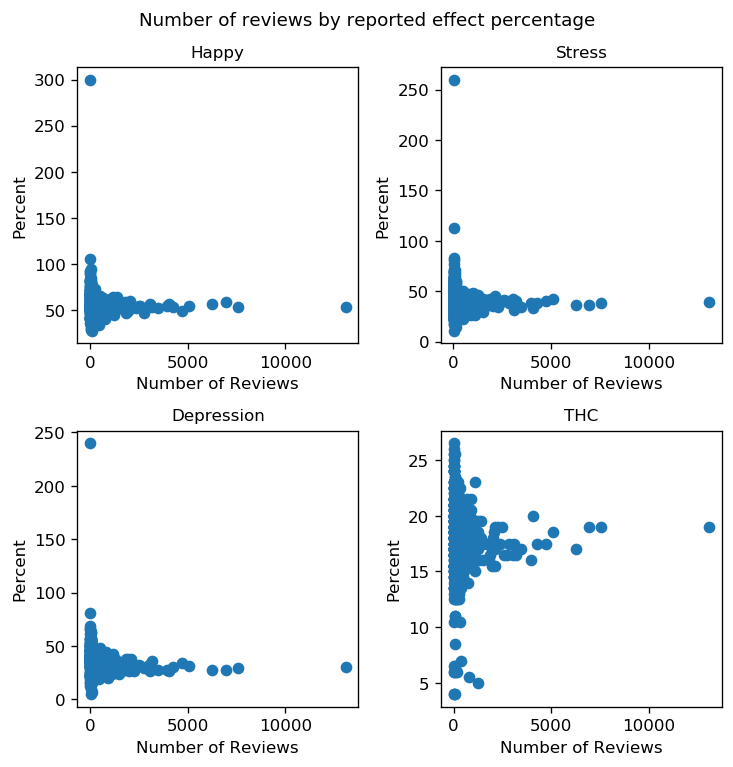

In [27]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(6,6), constrained_layout=True)
fig.suptitle('Number of reviews by reported effect percentage', y=1.04, fontsize=11)

#T - L
axs[0, 0].scatter(scatter_df['n_rate_rvws'], scatter_df['happy'])
axs[0,0].set_title('Happy', fontsize=10)

#B - L
axs[1, 0].scatter(scatter_df['n_rate_rvws'], scatter_df['depression'])
axs[1, 0].set_title('Depression', fontsize=10)

#T- R
axs[0, 1].scatter(scatter_df['n_rate_rvws'], scatter_df['stress'])
axs[0, 1].set_title('Stress', fontsize=10)

#B - R
axs[1, 1].scatter(scatter_df['n_rate_rvws'], scatter_df['thc_pct'])
axs[1, 1].set_title('THC', fontsize=10)

for ax in axs.flat:
    ax.set(xlabel='Number of Reviews', ylabel='Percent')
    
    
plt.show()


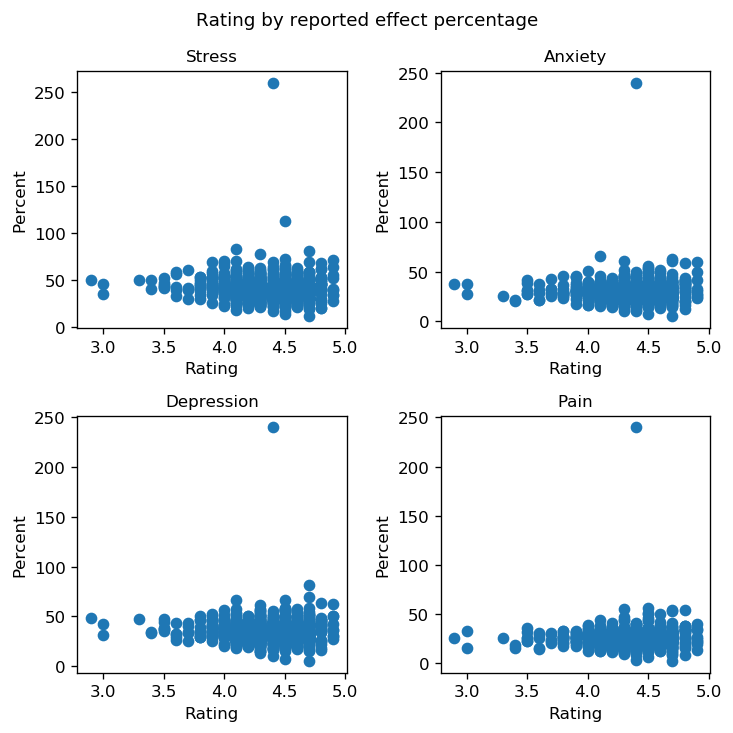

In [28]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(6,6), constrained_layout=True)
fig.suptitle('Rating by reported effect percentage', fontsize=11)

#T - L
axs[0, 0].scatter(scatter_df['rating'], scatter_df['stress'])
axs[0,0].set_title('Stress', fontsize=10)

#B - L
axs[1, 0].scatter(scatter_df['rating'], scatter_df['depression'])
axs[1, 0].set_title('Depression', fontsize=10)

#T- R
axs[0, 1].scatter(scatter_df['rating'], scatter_df['anxiety'])
axs[0, 1].set_title('Anxiety', fontsize=10)

#B - R
axs[1, 1].scatter(scatter_df['rating'], scatter_df['pain'])
axs[1, 1].set_title('Pain', fontsize=10)

for ax in axs.flat:
    ax.set(xlabel='Rating', ylabel='Percent')


plt.show()



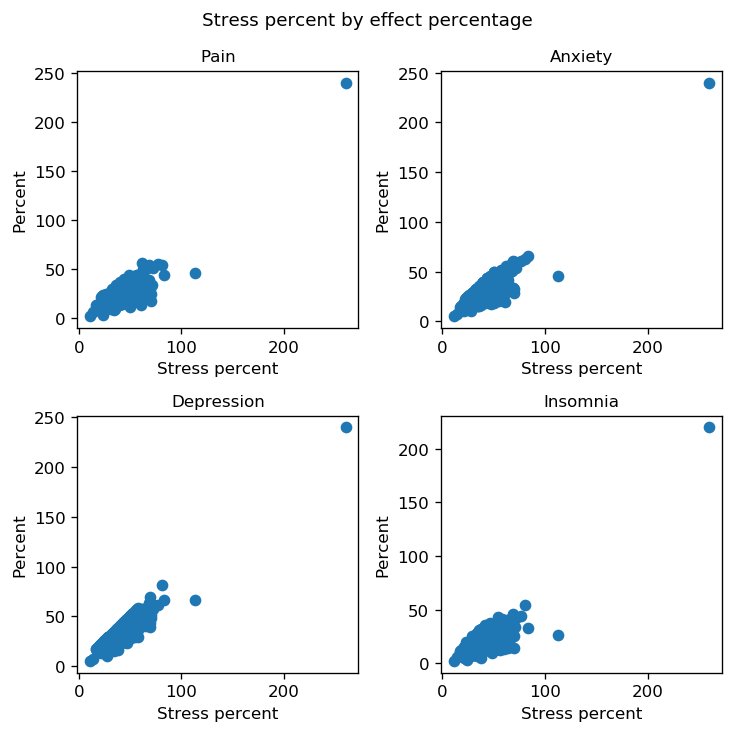

In [29]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(6,6), constrained_layout=True)
fig.suptitle('Stress percent by effect percentage', fontsize=11)

#T - L
axs[0, 0].scatter(scatter_df['stress'], scatter_df['pain'])
axs[0,0].set_title('Pain', fontsize=10)

#B - L
axs[1, 0].scatter(scatter_df['stress'], scatter_df['depression'])
axs[1, 0].set_title('Depression', fontsize=10)

#T- R
axs[0, 1].scatter(scatter_df['stress'], scatter_df['anxiety'])
axs[0, 1].set_title('Anxiety', fontsize=10)

#B - R
axs[1, 1].scatter(scatter_df['stress'], scatter_df['insomnia'])
axs[1, 1].set_title('Insomnia', fontsize=10)

for ax in axs.flat:
    ax.set(xlabel='Stress percent', ylabel='Percent')

plt.show()



Below, I created a copy of the initial `scatter_df` and dropped columns in order to calculate the z-score for the numeric columns. I calculated the z-score and kept values less than 3 standard deviations from the mean. 

In [30]:
scatter_2 = scatter_df.copy()

In [31]:
scatter_2.drop(['pop_loc', 'terp_descrip', 'terpenes', 
                 'grw_difficulty', 'height_in', 'yield_oz',
               'flwr_wks', 'n_people_eff', 'n_eff_reported', 'strain', 
                'prim_type', 'calm_vs_ener', 'cbd_pct'], axis=1, inplace=True)

In [32]:
scatter_3 = scatter_2.loc[scatter_2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [33]:
#scatter_3

Now, we can better see the relationship between the number of reviews and the percent of effects reported. 

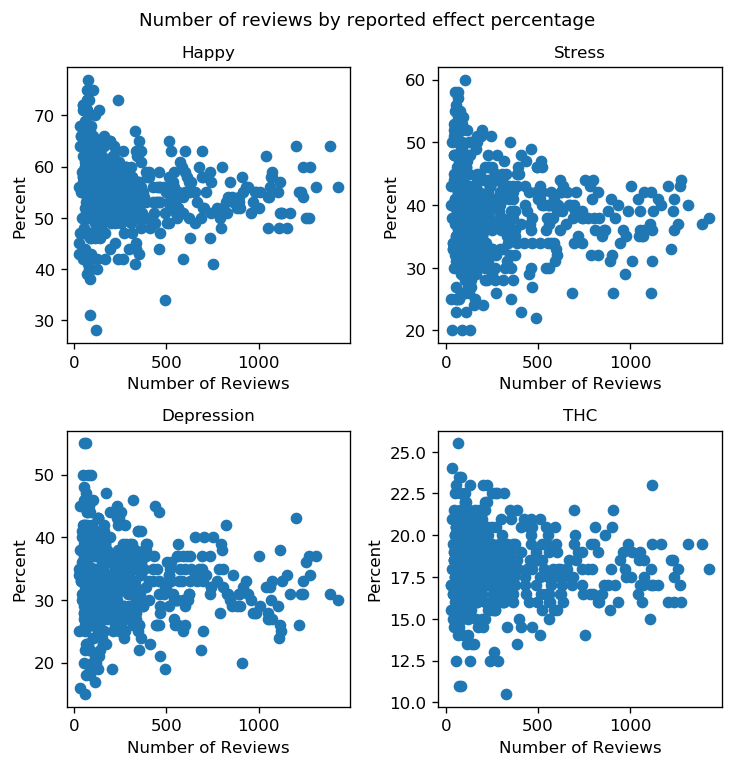

In [34]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(6,6), constrained_layout=True)
fig.suptitle('Number of reviews by reported effect percentage', y=1.04, fontsize=11)

#T - L
axs[0, 0].scatter(scatter_3['n_rate_rvws'], scatter_3['happy'])
axs[0,0].set_title('Happy', fontsize=10)

#B - L
axs[1, 0].scatter(scatter_3['n_rate_rvws'], scatter_3['depression'])
axs[1, 0].set_title('Depression', fontsize=10)

#T- R
axs[0, 1].scatter(scatter_3['n_rate_rvws'], scatter_3['stress'])
axs[0, 1].set_title('Stress', fontsize=10)

#B - R
axs[1, 1].scatter(scatter_3['n_rate_rvws'], scatter_3['thc_pct'])
axs[1, 1].set_title('THC', fontsize=10)

for ax in axs.flat:
    ax.set(xlabel='Number of Reviews', ylabel='Percent')
    
plt.show()
    
    
plt.show()

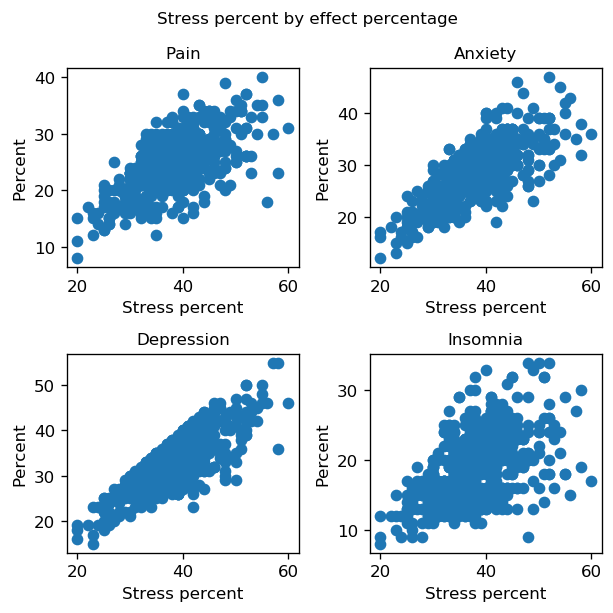

In [35]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(5,5), constrained_layout=True)
fig.suptitle('Stress percent by effect percentage')

#T - L
axs[0, 0].scatter(scatter_3['stress'], scatter_3['pain'],)
axs[0,0].set_title('Pain', fontsize=10)

#B - L
axs[1, 0].scatter(scatter_3['stress'], scatter_3['depression'])
axs[1, 0].set_title('Depression', fontsize=10)

#T- R
axs[0, 1].scatter(scatter_3['stress'], scatter_3['anxiety'])
axs[0, 1].set_title('Anxiety', fontsize=10)

#B - R
axs[1, 1].scatter(scatter_3['stress'], scatter_3['insomnia'])
axs[1, 1].set_title('Insomnia', fontsize=10)

for ax in axs.flat:
    ax.set(xlabel='Stress percent', ylabel='Percent')

plt.show()


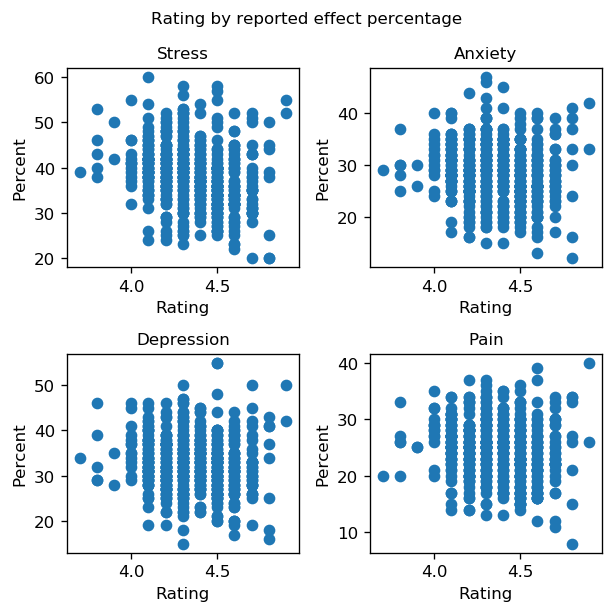

In [36]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(5,5), constrained_layout=True)
fig.suptitle('Rating by reported effect percentage')

#T - L
axs[0, 0].scatter(scatter_3['rating'], scatter_3['stress'],)
axs[0,0].set_title('Stress', fontsize=10)

#B - L
axs[1, 0].scatter(scatter_3['rating'], scatter_3['depression'])
axs[1, 0].set_title('Depression', fontsize=10)

#T- R
axs[0, 1].scatter(scatter_3['rating'], scatter_3['anxiety'])
axs[0, 1].set_title('Anxiety', fontsize=10)

#B - R
axs[1, 1].scatter(scatter_3['rating'], scatter_3['pain'])
axs[1, 1].set_title('Pain', fontsize=10)

for ax in axs.flat:
    ax.set(xlabel='Rating', ylabel='Percent')

plt.show()

In [37]:
scatter_4 = pd.merge(scatter_3, scatter_df['prim_type'], how='inner', left_index=True, right_index=True)
scatter_4

,n_rate_rvws,rating,thc_pct,relaxed,happy,euphoric,uplifted,creative,stress,depression,anxiety,pain,insomnia,dry_mouth,dry_eyes,dizzy,anxious,paranoid,prim_type
1,541.0,4.4,20.5,63.0,56.0,50.0,48.0,33.0,30.0,27.0,23.0,18.0,15.0,31.0,14.0,10.0,4.0,2.0,Hybrid
3,1389.0,4.2,19.5,70.0,64.0,58.0,45.0,45.0,37.0,31.0,25.0,23.0,14.0,42.0,22.0,15.0,13.0,6.0,Sativa
8,562.0,4.7,16.0,75.0,52.0,46.0,34.0,32.0,30.0,26.0,25.0,22.0,20.0,17.0,10.0,1.0,1.0,1.0,Indica
11,590.0,4.7,20.5,66.0,42.0,42.0,37.0,29.0,31.0,25.0,24.0,22.0,20.0,20.0,11.0,7.0,3.0,2.0,Indica
12,408.0,4.6,20.5,50.0,48.0,44.0,42.0,40.0,23.0,23.0,20.0,16.0,15.0,13.0,12.0,3.0,3.0,2.0,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,738.0,4.1,17.0,62.0,46.0,43.0,41.0,33.0,39.0,37.0,33.0,31.0,18.0,28.0,19.0,6.0,5.0,3.0,Indica
3234,523.0,4.3,18.5,58.0,55.0,53.0,44.0,33.0,46.0,36.0,35.0,34.0,23.0,35.0,22.0,7.0,5.0,5.0,Hybrid
3235,346.0,4.2,21.5,63.0,57.0,57.0,43.0,39.0,50.0,41.0,33.0,31.0,24.0,41.0,25.0,9.0,9.0,5.0,Indica
3236,789.0,4.6,19.5,75.0,50.0,45.0,43.0,30.0,32.0,28.0,26.0,26.0,24.0,26.0,15.0,6.0,3.0,3.0,Indica


Text(0.5, 1.0, 'Scatter of Rating and THC Percent')

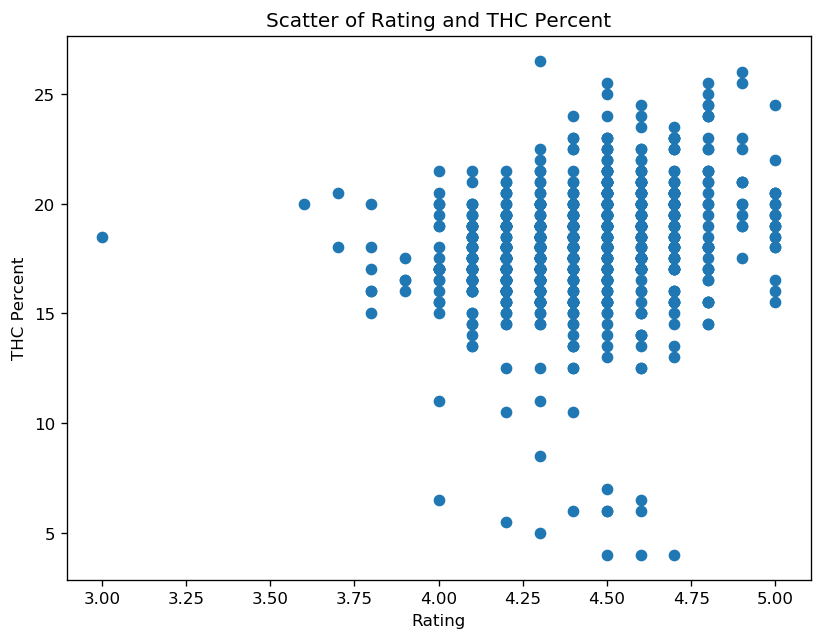

In [38]:
plt.scatter(x= df_copy['rating'], y= df_copy['thc_pct'])
plt.xlabel('Rating')
plt.ylabel('THC Percent')
plt.title('Scatter of Rating and THC Percent')

Text(0.5, 1.0, 'Scatter of Rating by THC Percent')

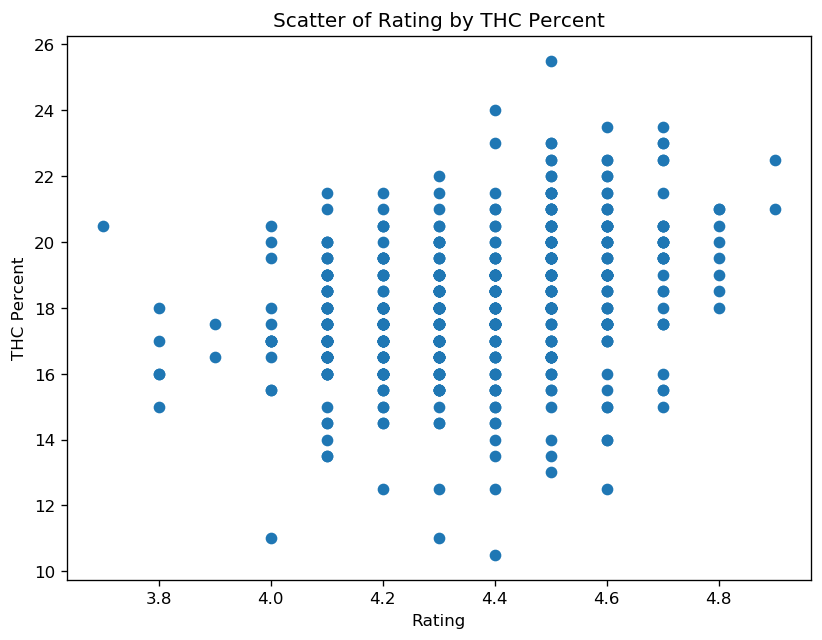

In [39]:
#plt.figure(figsize=None)
plt.scatter(x= scatter_3['rating'], y= scatter_3['thc_pct'])
plt.ylabel('THC Percent')
plt.xlabel('Rating')
plt.title('Scatter of Rating by THC Percent') #(filtered by 3 standard deviations)

Again, we can see that ratings are highly clustered between a 4 and 5. It is important to note that 5 was the max rating.

Text(0.5, 1.0, 'Histogram of Rating')

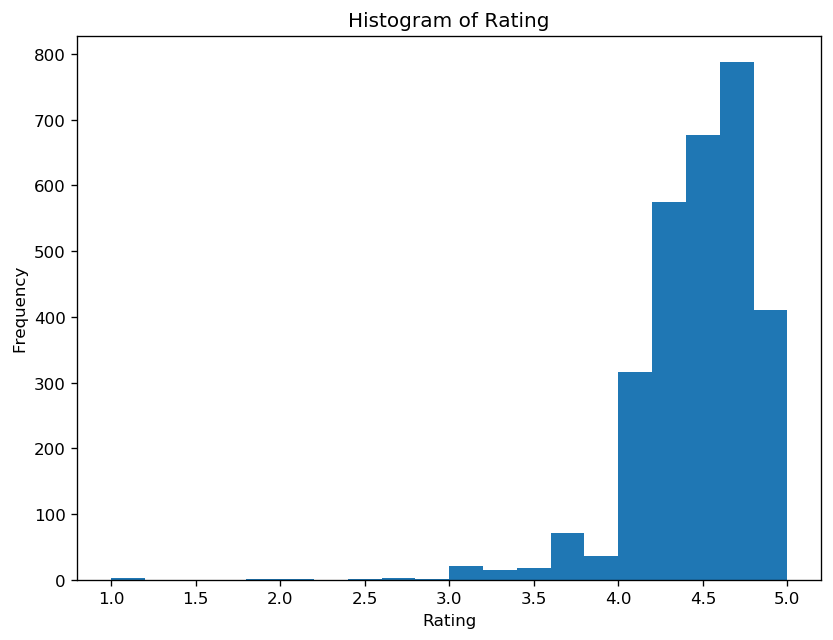

In [40]:
plt.hist(df_copy['rating'].dropna(), bins=20)
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Histogram of Rating')

Below, we can see that strains by their primary type have relatively similar ratings and THC percentages. Furthermore, It appears that the average THC percent is the same for each strain type.

Text(0.5, 1.0, 'Rating by primary strain type')

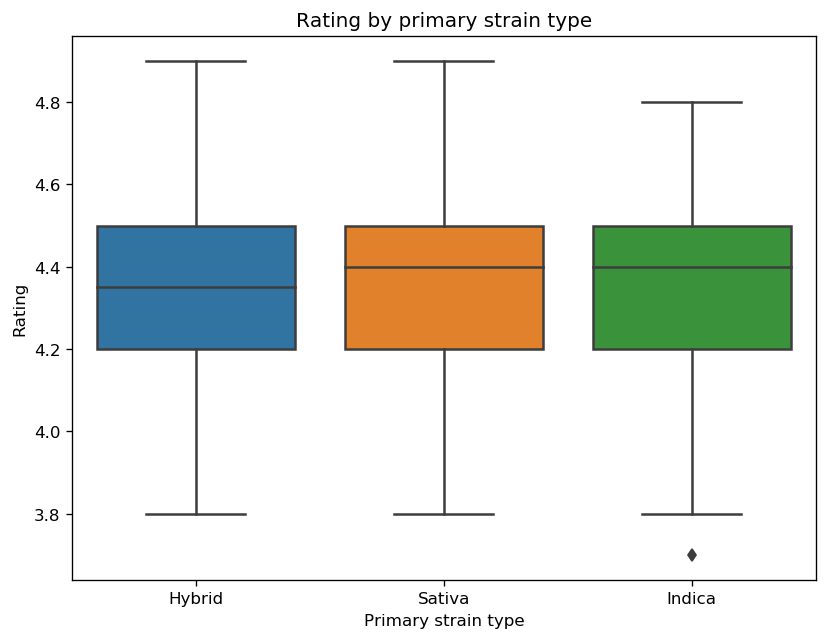

In [41]:
sns.boxplot(x='prim_type', y = 'rating', data=scatter_4)

plt.ylabel('Rating')
plt.xlabel('Primary strain type')
plt.title('Rating by primary strain type')

Text(0.5, 1.0, 'THC percent by primary type')

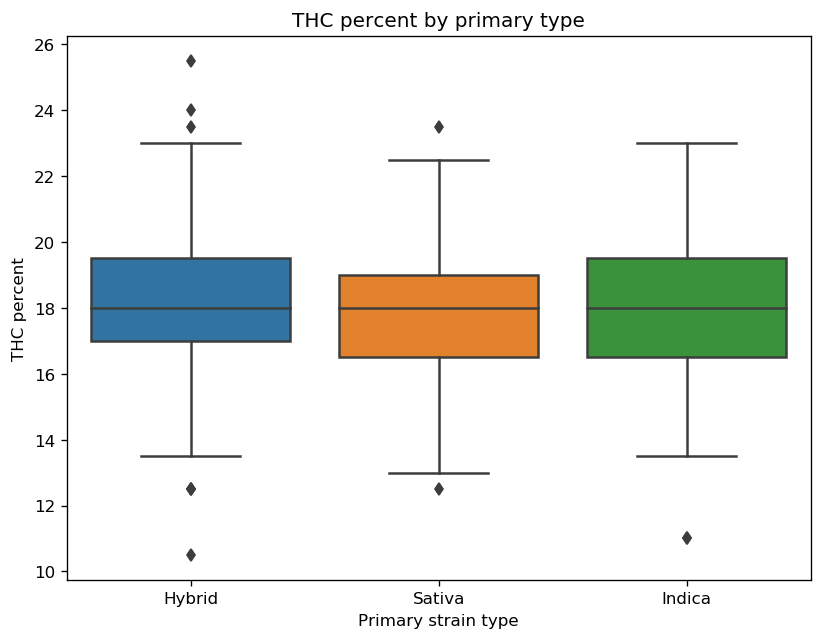

In [42]:
sns.boxplot(x='prim_type', y = 'thc_pct', data=scatter_4)

plt.ylabel('THC percent')
plt.xlabel('Primary strain type')
plt.title('THC percent by primary type')

Next, I examined the Pearson correlation values.

In [43]:
corr_df = df_copy.corr(method='pearson')
corr_df

,calm_vs_ener,cbd_pct,n_rate_rvws,rating,thc_pct,relaxed,happy,euphoric,uplifted,creative,stress,depression,anxiety,pain,insomnia,dry_mouth,dry_eyes,dizzy,anxious,paranoid
calm_vs_ener,1.000000,0.222030,0.034753,-0.084189,0.013402,-0.305603,0.073559,0.210480,0.410578,0.508363,-0.091782,-0.154046,-0.191503,-0.221453,-0.301978,-0.051164,-0.019387,0.071165,0.142549,0.144334
cbd_pct,0.222030,1.000000,-0.171600,0.263187,0.899434,-0.398397,-0.603820,-0.552401,-0.466249,-0.720277,-0.554510,-0.628796,-0.626911,-0.706403,-0.607229,-0.555802,-0.253966,-0.080450,-0.323432,-0.317083
n_rate_rvws,0.034753,-0.171600,1.000000,-0.082955,-0.043858,-0.121703,-0.064801,0.000556,0.036416,-0.008889,-0.063814,-0.087337,-0.031311,-0.007705,-0.087101,0.051950,0.033456,-0.041001,0.038256,0.034550
rating,-0.084189,0.263187,-0.082955,1.000000,0.232534,0.324967,0.214376,0.192545,0.174353,0.071376,-0.091174,-0.019964,-0.001788,0.023046,0.100107,-0.320378,-0.293794,-0.330495,-0.364556,-0.330662
thc_pct,0.013402,0.899434,-0.043858,0.232534,1.000000,-0.006124,0.079071,0.082573,0.138695,0.113578,-0.164385,-0.154102,-0.175968,-0.131725,-0.123762,-0.022637,-0.031885,-0.019653,-0.023543,-0.024202
relaxed,-0.305603,-0.398397,-0.121703,0.324967,-0.006124,1.000000,0.706147,0.569253,0.278871,0.227266,0.450263,0.467233,0.486911,0.505851,0.581580,0.280354,0.300834,0.004702,0.014600,-0.078170
happy,0.073559,-0.603820,-0.064801,0.214376,0.079071,0.706147,1.000000,0.832917,0.542300,0.462521,0.489074,0.478978,0.492870,0.511208,0.527269,0.359058,0.410445,0.063206,0.102833,0.013915
euphoric,0.210480,-0.552401,0.000556,0.192545,0.082573,0.569253,0.832917,1.000000,0.691546,0.565465,0.456202,0.447683,0.458792,0.472305,0.468672,0.364322,0.411241,0.069004,0.124525,0.050749
uplifted,0.410578,-0.466249,0.036416,0.174353,0.138695,0.278871,0.542300,0.691546,1.000000,0.706385,0.183330,0.175241,0.153202,0.143087,0.114490,0.140307,0.132298,0.083375,0.115240,0.080839
creative,0.508363,-0.720277,-0.008889,0.071376,0.113578,0.227266,0.462521,0.565465,0.706385,1.000000,0.158564,0.115967,0.098102,0.089161,0.091496,0.161179,0.171734,0.172610,0.210437,0.185559


In [44]:
corr_df[(corr_df > 0.6) | (corr_df < -0.6)]

,calm_vs_ener,cbd_pct,n_rate_rvws,rating,thc_pct,relaxed,happy,euphoric,uplifted,creative,stress,depression,anxiety,pain,insomnia,dry_mouth,dry_eyes,dizzy,anxious,paranoid
calm_vs_ener,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cbd_pct,NaN,1.000000,NaN,NaN,0.899434,NaN,-0.603820,NaN,NaN,-0.720277,NaN,-0.628796,-0.626911,-0.706403,-0.607229,NaN,NaN,NaN,NaN,NaN
n_rate_rvws,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thc_pct,NaN,0.899434,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relaxed,NaN,NaN,NaN,NaN,NaN,1.000000,0.706147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
happy,NaN,-0.603820,NaN,NaN,NaN,0.706147,1.000000,0.832917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
euphoric,NaN,NaN,NaN,NaN,NaN,NaN,0.832917,1.000000,0.691546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uplifted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.691546,1.000000,0.706385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creative,NaN,-0.720277,NaN,NaN,NaN,NaN,NaN,NaN,0.706385,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


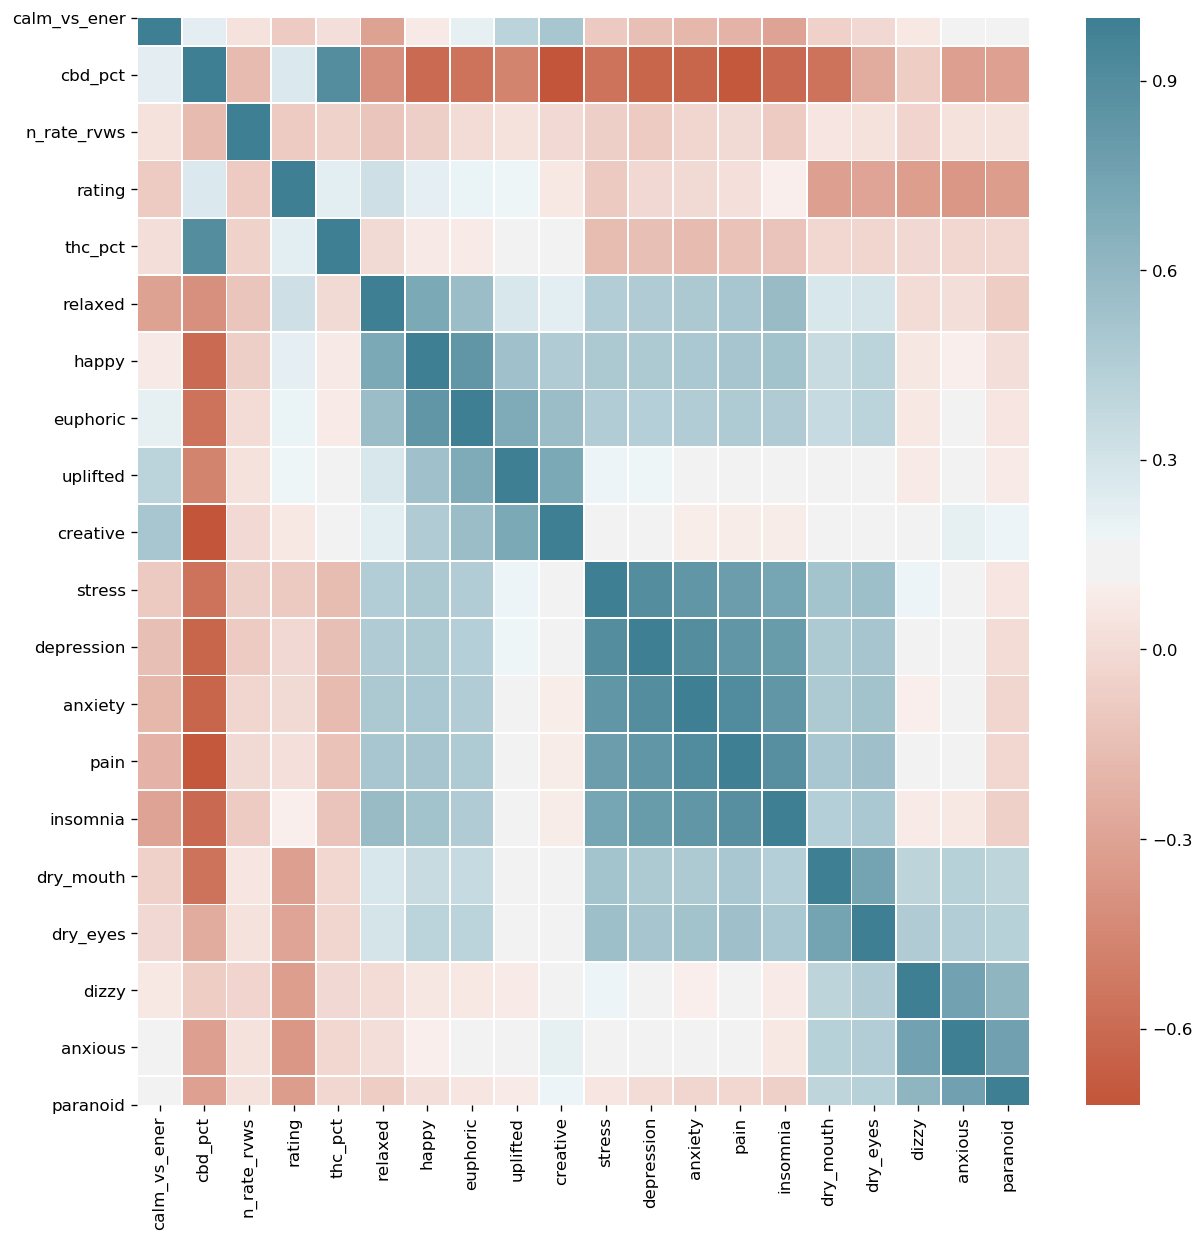

In [45]:
plt.figure(figsize=(12,12))
c_map = sns.diverging_palette(20, 220, n=200, as_cmap=True)
sns.heatmap(corr_df, cmap=c_map, linewidths = .5)

To make it easier to see values that were more highly correlated according to Pearson's r, I filtered for correlation values greater than 0.6 and less than -0.6. Like I observed above with the scatter plots, the strains that help with stress, depression, anxiety, pain, and insomnia appear to have a relatively strong positive correlation. Although this should be taken with caution due to a low amount of CBD percentage values, CBD appears to have some strong correlation with THC percent (positively) and creative and pain percentages (negatively). 

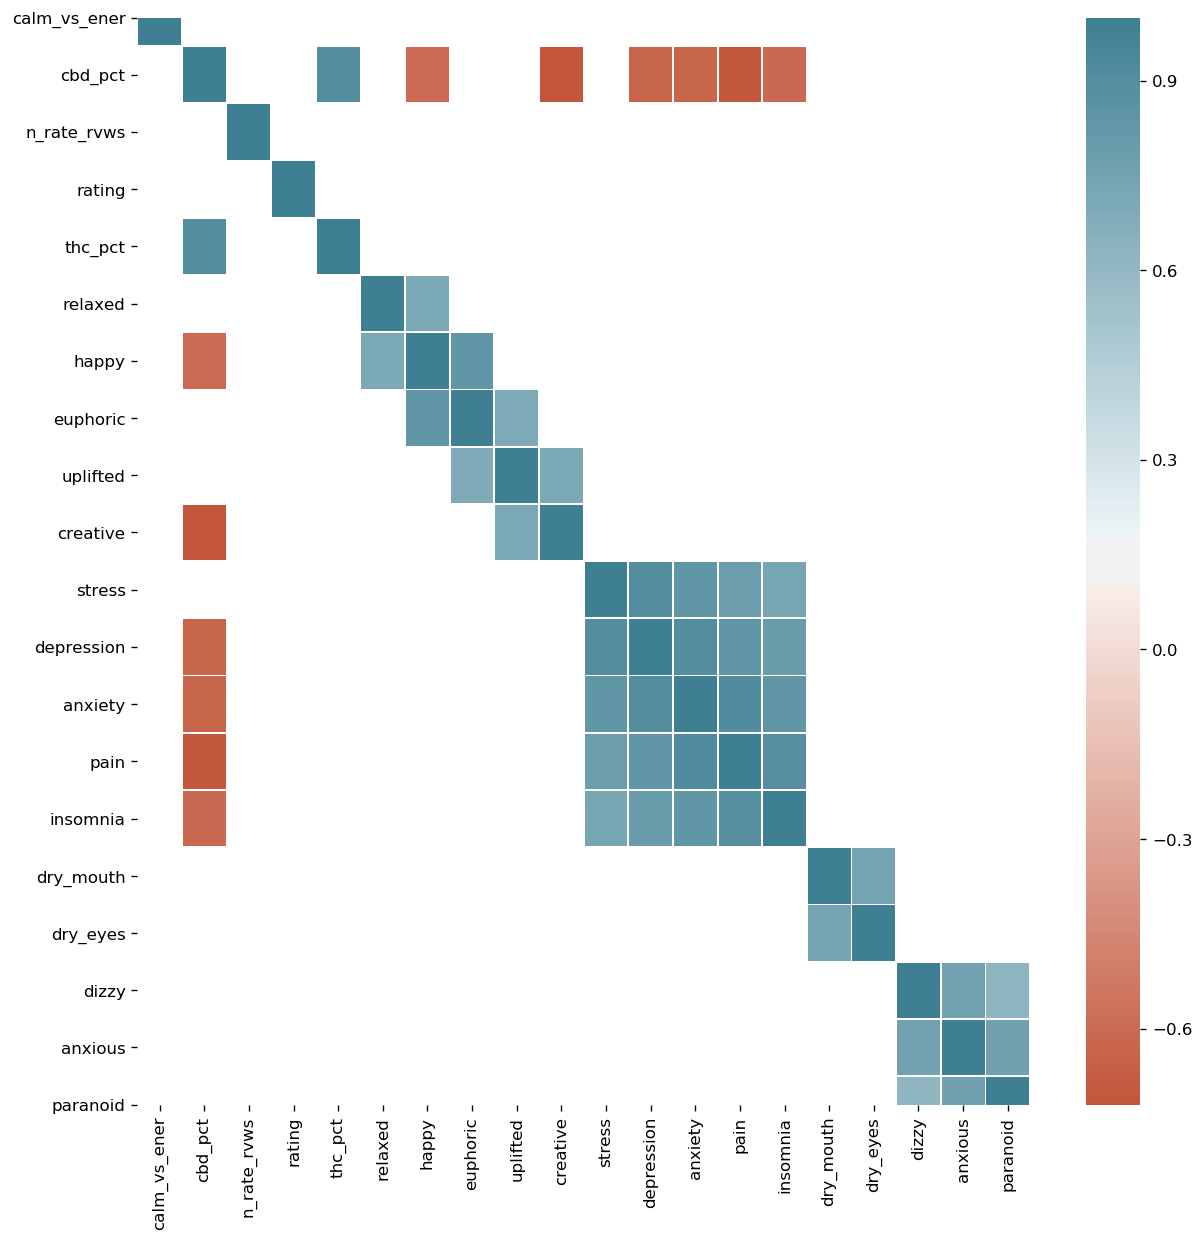

In [46]:
plt.figure(figsize=(12,12))
c_map = sns.diverging_palette(20, 220, n=200, as_cmap=True)
sns.heatmap(corr_df[(corr_df > 0.6) | (corr_df < -0.6)], cmap=c_map, linewidths = .5)

Here, I briefly explored some linear modeling using Seaborn. This is something I look forward to expanding on in the future. However, we can see similar relationships explored above. One notable effect on rating was that as those the reported a decrease in dry mouth ratings appeared to increase. Additionally, we can see the relationship among the strains that help with stress, depression, anxiety, pain, and insomnia.

Text(0.5, 1.08, 'Ratings by primary strain type and stress percentage')

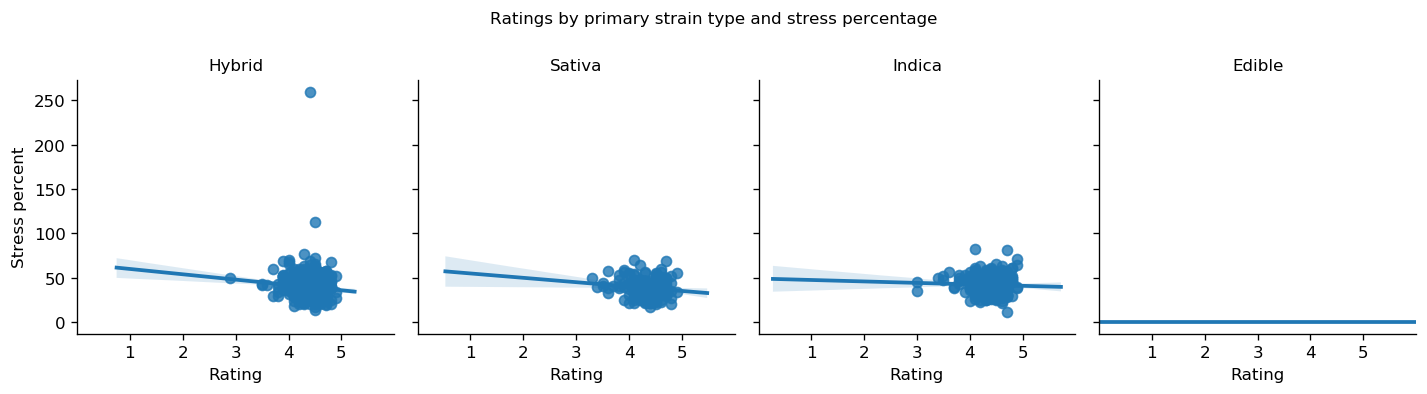

In [47]:
g = sns.lmplot(x = "rating", y = "stress", data=df_copy, 
           col='prim_type', col_wrap=4, height=3)

g.axes.flatten()
g.axes[0].set_title('Hybrid', fontsize = 10)
g.axes[1].set_title('Sativa', fontsize = 10)
g.axes[2].set_title('Indica',fontsize = 10)
g.axes[3].set_title('Edible',fontsize = 10)
g.set_axis_labels('Rating', 'Stress percent' )
plt.suptitle('Ratings by primary strain type and stress percentage', y=1.08)

Text(0.5, 1.08, 'Ratings by primary strain type and stress percentage')

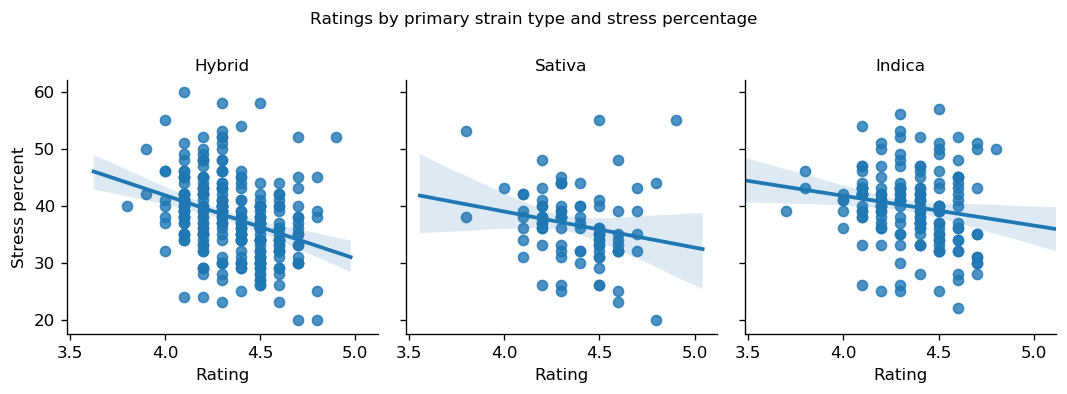

In [48]:
g1 = sns.lmplot(x = "rating", y = "stress", data=scatter_4, 
           col='prim_type', col_wrap=3, height=3)

g1.axes.flatten()
g1.axes[0].set_title('Hybrid', fontsize = 10)
g1.axes[1].set_title('Sativa', fontsize = 10)
g1.axes[2].set_title('Indica',fontsize = 10)
g1.set_axis_labels('Rating', 'Stress percent' )
plt.suptitle('Ratings by primary strain type and stress percentage', y=1.08)

Text(0.5, 1.08, 'Ratings by primary strain type and anxiety percentage')

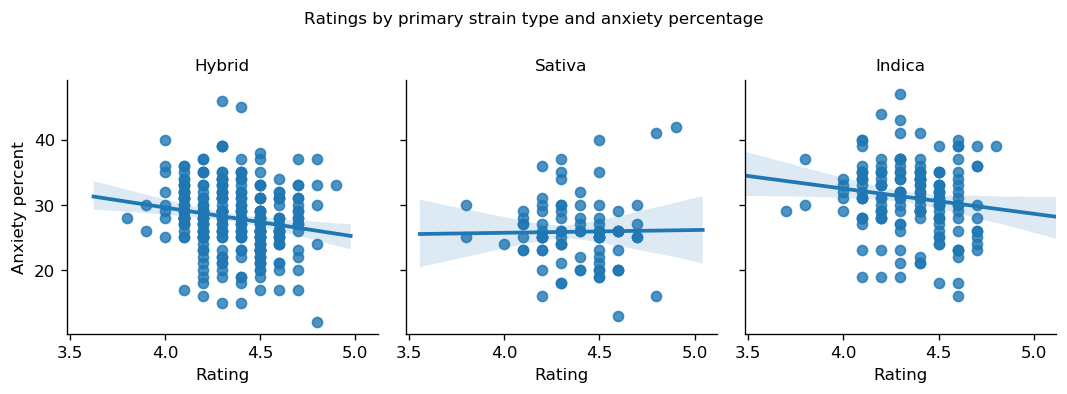

In [49]:
g2 = sns.lmplot(x = "rating", y = 'anxiety', data=scatter_4, 
           col='prim_type', col_wrap=3, height=3)

g2.axes.flatten()
g2.axes[0].set_title('Hybrid', fontsize = 10)
g2.axes[1].set_title('Sativa', fontsize = 10)
g2.axes[2].set_title('Indica',fontsize = 10)
g2.set_axis_labels('Rating', 'Anxiety percent' )
plt.suptitle('Ratings by primary strain type and anxiety percentage', y=1.08)

Text(0.5, 1.08, 'Ratings by primary strain type and Dry mouth percentage')

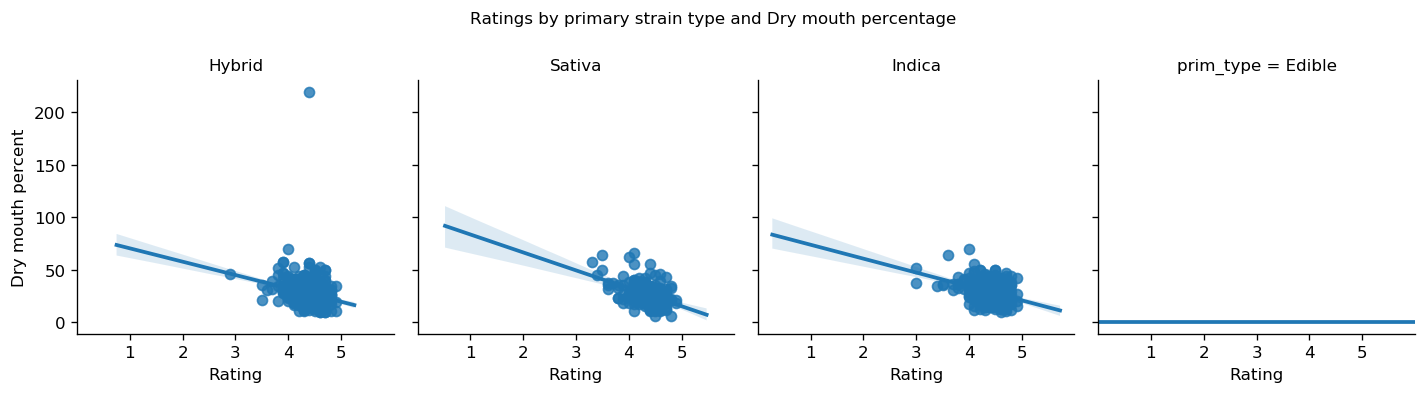

In [50]:
g3 = sns.lmplot(x = "rating", y = 'dry_mouth', data=df_copy, 
           col='prim_type', col_wrap=4, height=3)

g3.axes.flatten()
g3.axes[0].set_title('Hybrid', fontsize = 10)
g3.axes[1].set_title('Sativa', fontsize = 10)
g3.axes[2].set_title('Indica',fontsize = 10)
g3.set_axis_labels('Rating', 'Dry mouth percent' )
plt.suptitle('Ratings by primary strain type and Dry mouth percentage', y=1.08)

Text(0.5, 1.08, 'Ratings by primary strain type and Dry mouth percentage')

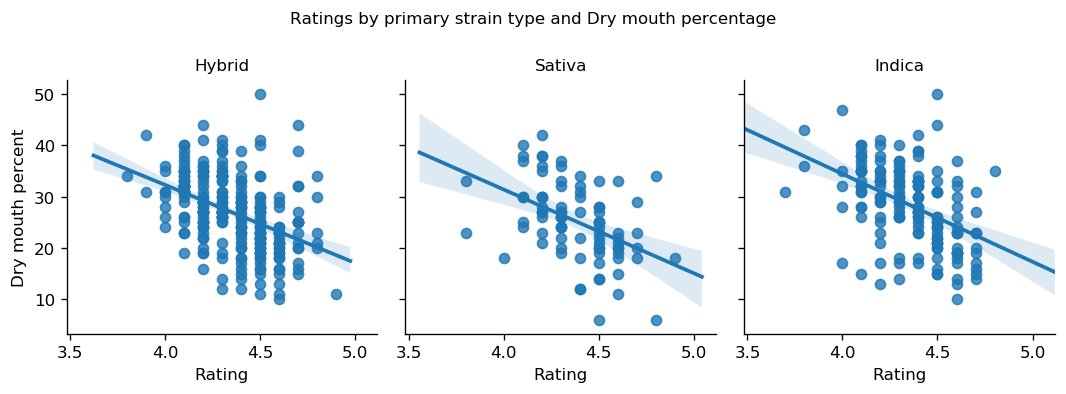

In [51]:
g4 =sns.lmplot(x = "rating", y = 'dry_mouth', data=scatter_4, 
           col='prim_type', col_wrap=3, height=3)

g4.axes.flatten()
g4.axes[0].set_title('Hybrid', fontsize = 10)
g4.axes[1].set_title('Sativa', fontsize = 10)
g4.axes[2].set_title('Indica',fontsize = 10)
g4.set_axis_labels('Rating', 'Dry mouth percent' )
plt.suptitle('Ratings by primary strain type and Dry mouth percentage', y=1.08)

Text(0.5, 1.08, 'Stress by depression percentages')

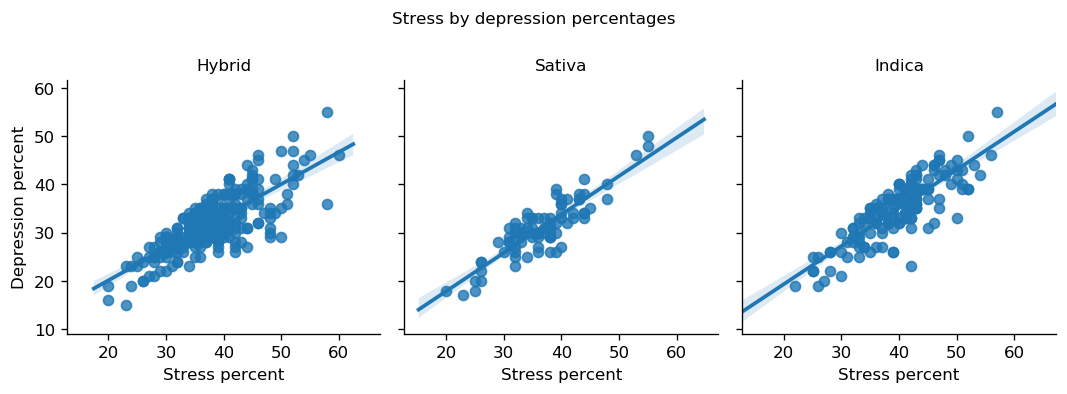

In [52]:
g5 = sns.lmplot(x = "stress", y = 'depression', data=scatter_4, 
           col='prim_type', col_wrap=3, height=3)

g5.axes.flatten()
g5.axes[0].set_title('Hybrid', fontsize = 10)
g5.axes[1].set_title('Sativa', fontsize = 10)
g5.axes[2].set_title('Indica',fontsize = 10)
g5.set_axis_labels('Stress percent', 'Depression percent' )
plt.suptitle('Stress by depression percentages', y=1.08)

Text(0.5, 1.08, 'Stress by anxiety percentages')

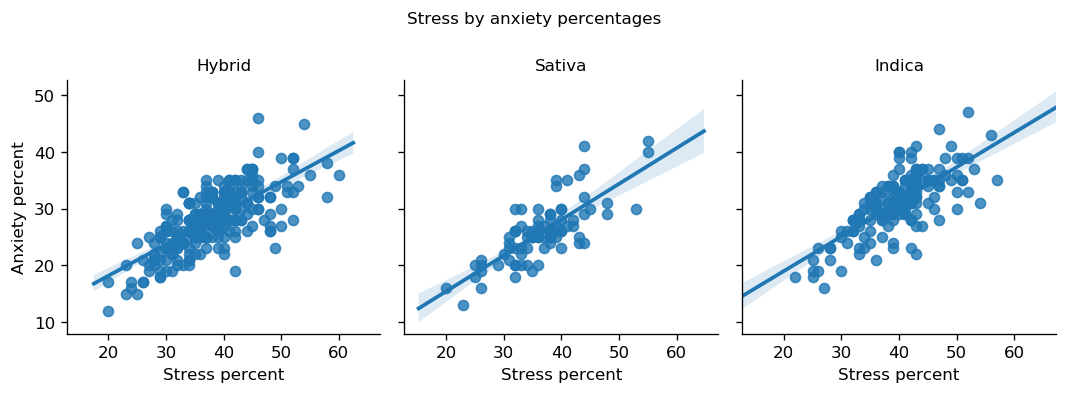

In [53]:
g6 = sns.lmplot(x = "stress", y = 'anxiety', data=scatter_4, 
           col='prim_type', col_wrap=3, height=3)

g6.axes.flatten()
g6.axes[0].set_title('Hybrid', fontsize = 10)
g6.axes[1].set_title('Sativa', fontsize = 10)
g6.axes[2].set_title('Indica',fontsize = 10)
g6.set_axis_labels('Stress percent', 'Anxiety percent')
plt.suptitle('Stress by anxiety percentages', y=1.08)

#### Popular Locations

Below, I started to examine the impact of popular locations. First, I had to do some cleaning in order to do analysis. I had to split the strings in the column and I created a new column, `splt_loc` to contain the split values. I also removed NaN values.

In [54]:
df_loc = df_copy.copy()

In [55]:
df_loc['splt_loc'] = df_loc['pop_loc'].str.replace(', ',',').str.split(',')

In [56]:
df_loc['splt_loc'].dropna(0, inplace=True)

In [57]:
df_loc['splt_loc'].shape

(2576,)

Then I created rows based on the original index for each location in the new column. After that I merged the newly created data frame with the original to explore popular locations.

In [58]:
new_lst = []
for index_, item in zip(df_loc.index, df_loc.splt_loc):
    new_lst.extend(map(lambda x: [index_, x], item))

splt_df = pd.DataFrame(new_lst, columns=['index', 'splt_loc'])
splt_df.head()

,index,splt_loc
0,0,Seattle
1,0,WA
2,0,Portland
3,0,OR
4,0,Everett


In [59]:
final_loc = pd.merge(df_loc.drop('splt_loc', axis=1), splt_df, how='right', left_index=True, right_on='index')
final_loc.drop('pop_loc', axis=1, inplace=True)
final_loc.shape

(36438, 38)

Here, we can see the popular states but it looks like more cleaning needs to occur. Thus, I modified the according states to match the proper state abbreviation. Additionally there is a column that represents an empty string. Due the scraping unknowns, this was intentionally left. It is possible it may represent different locations because people left it blank in their reviews.

In [60]:
final_loc.splt_loc[1::2].value_counts()

WA               5999
OR               3122
CA               2234
CO               1516
OK               1459
AZ                821
MD                687
MI                522
NV                443
IL                290
ME                236
MA                201
AK                168
FL                139
OH                 70
AR                 42
NC                 36
PR                 29
GA                 29
Co                 22
DC                 22
NM                 16
                   16
TN                 15
ND                 10
Or                  9
Oklahoma            9
Michigan            6
Massachusetts       6
Ca                  5
NJ                  5
HI                  4
PA                  4
Maine               4
MT                  4
TX                  3
VT                  3
Florida             2
co                  2
California          2
Ok                  1
MO                  1
Colorado            1
DE                  1
NY                  1
LA        

In [61]:
final_loc.loc[final_loc['splt_loc'] == 'Oklahoma', 'splt_loc'] = 'OK'

final_loc.loc[final_loc['splt_loc'] == 'Or', 'splt_loc'] = 'OR'

final_loc.loc[final_loc['splt_loc'] == 'Michigan', 'splt_loc'] = 'MI'

final_loc.loc[final_loc['splt_loc'] == 'Massachusetts', 'splt_loc'] = 'MA'

final_loc.loc[final_loc['splt_loc'] == 'Ca', 'splt_loc'] = 'CA'

final_loc.loc[final_loc['splt_loc'] == 'Maine', 'splt_loc'] = 'ME'

final_loc.loc[final_loc['splt_loc'] == 'co', 'splt_loc'] = 'CO'

final_loc.loc[final_loc['splt_loc'] == 'California', 'splt_loc'] = 'CA'

final_loc.loc[final_loc['splt_loc'] == 'Florida', 'splt_loc'] = 'FL'

final_loc.loc[final_loc['splt_loc'] == 'Colorado', 'splt_loc'] = 'CO'

final_loc.loc[final_loc['splt_loc'] == 'Ok', 'splt_loc'] = 'OK'

final_loc.loc[final_loc['splt_loc'] == 'Co', 'splt_loc'] = 'CO'

In [62]:
final_loc.splt_loc[1::2].value_counts()

WA    5999
OR    3131
CA    2241
CO    1541
OK    1469
AZ     821
MD     687
MI     528
NV     443
IL     290
ME     240
MA     207
AK     168
FL     141
OH      70
AR      42
NC      36
PR      29
GA      29
DC      22
NM      16
        16
TN      15
ND      10
NJ       5
PA       4
HI       4
MT       4
TX       3
VT       3
DE       1
KS       1
NY       1
MO       1
LA       1
Name: splt_loc, dtype: int64

Below, we see Washington has the highest number of popular locations by state (including Washington, D.C.) and Seattle had the highest number of popular locations by cities.

Text(0.5, 1.0, 'State by popularity frequency')

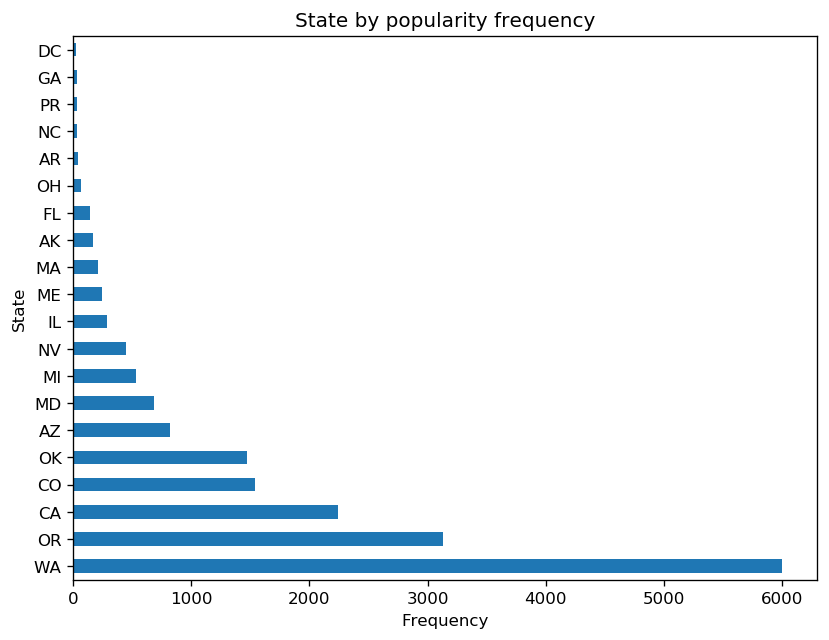

In [63]:
final_loc.splt_loc[1::2].value_counts(sort=True).head(20).plot.barh()

plt.ylabel('State')
plt.xlabel('Frequency')
plt.title('State by popularity frequency')

In [64]:
loc_type_counts = final_loc.groupby(['prim_type', 'splt_loc']).size().unstack(fill_value=0)
loc_type_counts

splt_loc,,AK,AR,AZ,Aberdeen,Acton,Ada,Addison,Adrian,Afton,...,Woodward,Woolwich,Worcester,Wynnewood,Yakima,Yerington,York,Youngtown,Ypsilanti,Yukon
prim_type,,,,,,,,,,,,,,,,,,,,,
Edible,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hybrid,35,93,27,503,20,1,27,2,17,7,...,6,2,4,3,2,1,4,5,9,1
Indica,4,46,4,191,8,1,12,4,6,1,...,3,0,1,0,1,2,0,5,1,0
Sativa,8,29,11,127,3,1,5,2,1,3,...,0,1,0,0,0,1,0,1,2,0


In [65]:
final_loc.splt_loc[::2].value_counts()

Seattle        774
Portland       770
Denver         480
Los Angeles    430
Bellingham     420
              ... 
Eliot            1
Covington        1
Deltona          1
Orange Park      1
El Paso          1
Name: splt_loc, Length: 759, dtype: int64

Text(0.5, 1.0, 'City by popularity frequency')

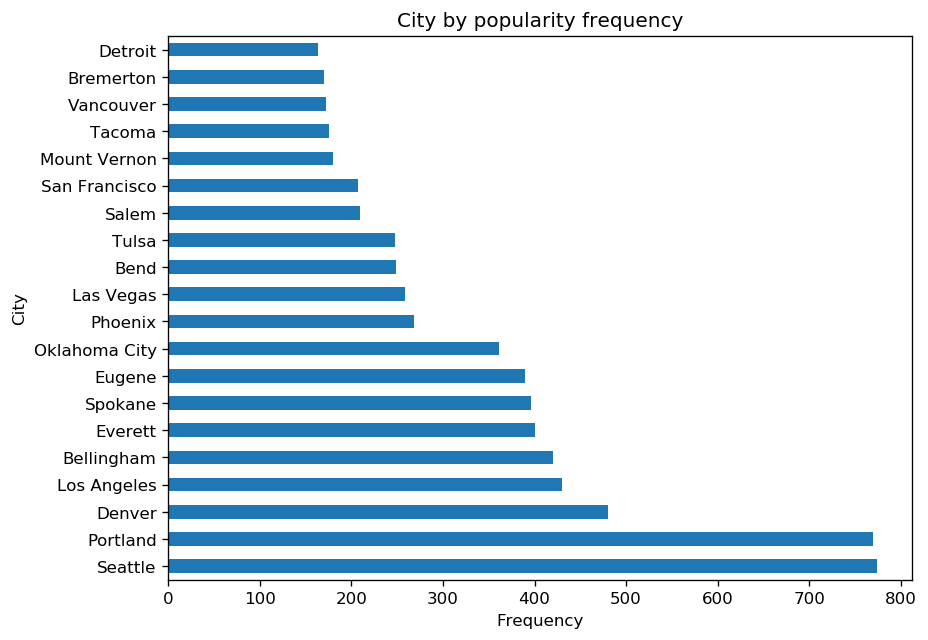

In [66]:
final_loc.splt_loc[::2].value_counts(sort=True).head(20).plot.barh()

plt.ylabel('City')
plt.xlabel('Frequency')
plt.title('City by popularity frequency')

Below, I grouped the data by popular location and took the average of the rating column to display primary strain type and the strains that had the highest average rating. We can see which places have high average ratings for both the primary strain type and the strain.

In [67]:
loc_type = final_loc.groupby(['splt_loc', 'prim_type'])[['rating']].mean().dropna().sort_values('rating', ascending=False)
loc_type

,,rating
splt_loc,prim_type,
Scappoose,Sativa,5.0
Depoe Bay,Indica,5.0
Conway,Indica,5.0
New River,Hybrid,5.0
Eatontown,Hybrid,5.0
...,...,...
Rio Vista,Hybrid,3.0
White Cloud,Indica,3.0
Elmwood Park,Sativa,2.7


In [68]:
strain_df = final_loc[['strain','splt_loc', 'rating']]

In [69]:
#strain_loc_gp = strain_df.groupby('splt_loc')

In [70]:
strain_loc_gp2 = strain_df.groupby(['splt_loc','strain'])

In [71]:
strain_loc_gp2[['strain','rating']].mean().dropna().sort_values('rating', ascending=False)

,,rating
splt_loc,strain,
CO,Horace,5.0
WA,The Guice,5.0
Lynnwood,Mendo Afgoo,5.0
Phoenix,Force OG,5.0
Burien,G-Force,5.0
...,...,...
AZ,Taliban Poison,1.8
Denver,Lemon Berry Candy OG,1.0
CA,Purple Tide,1.0


**Weighted Average Ratings**

However, to get a better representation of average ratings, I weighted the average rating by the number of reviews of each strain and primary strain type. First, I examined the weighted average for primary strain type.

In [72]:
wt_avg_df = final_loc[['splt_loc', 'rating', 'prim_type', 'n_rate_rvws']]
wt_avg_df.dropna(inplace=True)

/Users/Tyler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
wt_type_df = pd.DataFrame(wt_avg_df.groupby(["splt_loc","prim_type"]).apply(lambda df: (df["rating"] * df["n_rate_rvws"]).sum() / df["n_rate_rvws"].sum()))

wt_type_df.reset_index(inplace=True)

In [74]:
wt_type_df.columns = ['splt_loc', 'prim_type', 'wt_rating']
wt_type_df

,splt_loc,prim_type,wt_rating
0,,Hybrid,4.328725
1,,Indica,4.312766
2,,Sativa,4.472152
3,AK,Hybrid,4.337670
4,AK,Indica,4.495692
...,...,...,...
1828,Youngtown,Sativa,3.600000
1829,Ypsilanti,Hybrid,4.306122
1830,Ypsilanti,Indica,5.000000
1831,Ypsilanti,Sativa,4.700000


Below, we can see that the weighted average of rating by primary strain type is pretty close for each of the cities with an approximate rating of 4.3 out of 5. 

In [75]:
wt_type_df[wt_type_df['splt_loc'] == 'Seattle'].sort_values(by='wt_rating', 
                                                            ascending = False).round(2)

,splt_loc,prim_type,wt_rating
1547,Seattle,Sativa,4.37
1546,Seattle,Indica,4.32
1545,Seattle,Hybrid,4.31


In [76]:
wt_type_df[wt_type_df['splt_loc'] == 'Portland'].sort_values(by='wt_rating', 
                                                             ascending = False).round(2)


,splt_loc,prim_type,wt_rating
1391,Portland,Sativa,4.33
1389,Portland,Hybrid,4.31
1390,Portland,Indica,4.28


In [77]:
wt_type_df[wt_type_df['splt_loc'] == 'Denver'].sort_values(by='wt_rating', 
                                                           ascending = False).round(2)



,splt_loc,prim_type,wt_rating
471,Denver,Hybrid,4.36
472,Denver,Indica,4.33
473,Denver,Sativa,4.32


Similar to above, I examined the weighted average ratings for strains by location. I displayed the top 10 strains for the three cities that had the highest frequency of mentions: Seattle, Portland, and Denver.

In [78]:
wt_avg_df2 = final_loc[['splt_loc', 'rating', 'strain', 'n_rate_rvws']]
wt_avg_df2.dropna(inplace=True)

/Users/Tyler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
wt_avg_df2 = wt_avg_df2.groupby(["splt_loc","strain"]).apply(lambda dfx: (dfx["rating"] * dfx["n_rate_rvws"]).sum() / dfx["n_rate_rvws"].sum())

wt_strain = pd.DataFrame(wt_avg_df2).reset_index()

wt_strain.columns = ['splt_loc', 'strain', 'wt_rating']

wt_strain = wt_strain.sort_values(by='wt_rating', ascending = False)

In [80]:
seattle = wt_strain[wt_strain['splt_loc'] == 'Seattle'].sort_values(by='wt_rating', ascending = False)
seattle.head(10)

,splt_loc,strain,wt_rating
18995,Seattle,Golden Calyx,5.0
18752,Seattle,Apollo Haze,5.0
19277,Seattle,Smarties,5.0
19275,Seattle,Slice of Heaven,5.0
19276,Seattle,Slurpie,5.0
19380,Seattle,True Love,5.0
19369,Seattle,Total Paralysis,5.0
19239,Seattle,Rafael,5.0
19350,Seattle,Tarmonster,5.0
19243,Seattle,Red Velvet Pie,5.0


In [81]:
portland = wt_strain[wt_strain['splt_loc'] == 'Portland'].sort_values(by='wt_rating', ascending = False)
portland.head(10)

,splt_loc,strain,wt_rating
16540,Portland,Alien Cookies,5.0
16748,Portland,Dutch 47,5.0
17024,Portland,Red Kross,5.0
17025,Portland,Red Rhino,5.0
17052,Portland,Shark Widow,5.0
17068,Portland,Sorcerer’s Apprentice,5.0
17164,Portland,Triangle Mints,5.0
17212,Portland,‘88 G13 Hashplant,5.0
16750,Portland,Dutch Dynasty,5.0
16789,Portland,Ghetto Bird,5.0


In [82]:
denver = wt_strain[wt_strain['splt_loc'] == 'Denver'].sort_values(by='wt_rating', ascending = False)
denver.head(10)

,splt_loc,strain,wt_rating
6368,Denver,Lost Coast Hash Plant,5.0
6257,Denver,Dr. Greenthumb’s Em-Dog,5.0
6540,Denver,White Dawg Fire OG,5.0
6140,Denver,Alpha Cow,5.0
6125,Denver,541 Kush,5.0
6154,Denver,Bangi Haze,5.0
6229,Denver,Crippy Killer,5.0
6219,Denver,Cindy Haze,5.0
6212,Denver,Chicle,5.0
6259,Denver,Dutch Dynasty,5.0


In [83]:
wt_group = wt_strain.sort_values(by='wt_rating', ascending = False).groupby('splt_loc', sort=False)


for key, values in wt_group:
    print(key) #this indicates the grouping
    print('-'*70)
    print(values) #this is a dataframe for that 
    print('\n')

CO
----------------------------------------------------------------------
     splt_loc                 strain  wt_rating
4438       CO             Gunslinger        5.0
4478       CO        Kelly Hill Gold        5.0
4495       CO              Leia Kush        5.0
4503       CO          Little Dragon        5.0
4506       CO  Lost Coast Hash Plant        5.0
...       ...                    ...        ...
4387       CO             Freezeland        3.4
4625       CO        Romping Goddess        3.2
4173       CO             Al's Dream        3.0
4156       CO             12 Year OG        3.0
4496       CO   Lemon Berry Candy OG        1.0

[636 rows x 3 columns]


OR
----------------------------------------------------------------------
      splt_loc              strain  wt_rating
14506       OR  Fred Flipn’ Stoned        5.0
14303       OR         Brain Candy        5.0
14606       OR    Huckleberry Soda        5.0
14604       OR       Huckleberries        5.0
14579       OR      

19765  Silverdale         Afghan Big Bud        3.6


Ardmore
----------------------------------------------------------------------
     splt_loc             strain  wt_rating
1098  Ardmore       Gello Gelato        5.0
1104  Ardmore     Perfect Purple        5.0
1095  Ardmore             Anubis        4.9
1108  Ardmore       Snow Goddess        4.8
1096  Ardmore         Deep Chunk        4.6
1111  Ardmore           Vader OG        4.6
1105  Ardmore        Pure Afghan        4.6
1097  Ardmore          Double OG        4.5
1110  Ardmore  Sweet Black Angel        4.5
1099  Ardmore  God's Green Crack        4.5
1106  Ardmore             Skydog        4.5
1103  Ardmore      Loud Lemonade        4.5
1112  Ardmore       Valley Ghash        4.5
1101  Ardmore         Jack Wreck        4.4
1109  Ardmore       Sour Pebbles        4.3
1107  Ardmore    Skywalker Alien        4.3
1102  Ardmore          Jacked-Up        4.1
1100  Ardmore                Ice        4.0


Fort Smith
------------------

20571       TN                Willy Wonka        4.1


Gunnison
----------------------------------------------------------------------
      splt_loc               strain  wt_rating
8954  Gunnison                   C3        5.0
8951  Gunnison  Blood Orange Sorbet        5.0
8956  Gunnison        Dutch Dynasty        5.0
8952  Gunnison        Bubba x Skunk        5.0
8959  Gunnison         GMO Zkittlez        5.0
8965  Gunnison        Phantom Arrow        5.0
8967  Gunnison    Royal Purple Kush        5.0
8958  Gunnison        Fruit Rollupz        5.0
8969  Gunnison         Serious Kush        5.0
8962  Gunnison         Killer Grape        4.8
8961  Gunnison        Illuminati OG        4.8
8966  Gunnison       Purple Pantera        4.8
8974  Gunnison            Trap Star        4.8
8949  Gunnison             Alpha OG        4.7
8955  Gunnison           Dream Star        4.6
8971  Gunnison          Sour Bubble        4.6
8970  Gunnison  Shining Silver Haze        4.5
8960  Gunnison    H



Jefferson
----------------------------------------------------------------------
       splt_loc        strain  wt_rating
9342  Jefferson  Inferno Haze        5.0
9343  Jefferson   Very Cherry        4.6


Gambrills
----------------------------------------------------------------------
       splt_loc         strain  wt_rating
8540  Gambrills  Bog Blue Kush        5.0
8541  Gambrills        La Niña        4.7
8542  Gambrills  Misty Morning        4.5


Lewiston
----------------------------------------------------------------------
       splt_loc                strain  wt_rating
10078  Lewiston  Flowers For Algernon        5.0
10084  Lewiston            Sugar Pine        4.7
10082  Lewiston      Russian Roulette        4.5
10083  Lewiston         Sour Headband        4.5
10077  Lewiston          Blue Afghani        4.4
10081  Lewiston         Ladyburn 1974        4.2
10079  Lewiston       Grapefruit Haze        4.1
10080  Lewiston            Kushashima        4.0


Scottsdale
-------

9054  Hillsboro   White Chocolate        3.6


Winston-Salem
----------------------------------------------------------------------
            splt_loc         strain  wt_rating
22945  Winston-Salem     Jack Smack        5.0
22944  Winston-Salem   Ganesh Berry        4.6
22946  Winston-Salem  Mountain Girl        4.6


La Grande
----------------------------------------------------------------------
       splt_loc           strain  wt_rating
9644  La Grande  Face Off OG Bx1        5.0
9645  La Grande        SleeSkunk        4.3


MD
----------------------------------------------------------------------
      splt_loc                strain  wt_rating
11189       MD              Fauxsido        5.0
11159       MD      Comfortably Dumb        5.0
11169       MD           Designer OG        5.0
11190       MD    Fire Alien Romulan        5.0
11185       MD  Ethos Hash Plant Bx1        5.0
...        ...                   ...        ...
11245       MD          Ms. Universe        3.5
11237

16073   Peoria     Chem Beyond Diesel CBD        4.0


Burtonsville
----------------------------------------------------------------------
          splt_loc                  strain  wt_rating
3307  Burtonsville           Bog Blue Kush        5.0
3309  Burtonsville  L.A.K. Federal Reserve        5.0
3306  Burtonsville   Arjan's Ultra Haze #1        4.9
3310  Burtonsville             Magic Melon        4.7
3308  Burtonsville               Kona Gold        4.5
3311  Burtonsville            White Master        3.7


Pendleton
----------------------------------------------------------------------
        splt_loc                   strain  wt_rating
16066  Pendleton             Pirate Radio        5.0
16058  Pendleton         California Limes        5.0
16059  Pendleton  Grandma’s Sugar Cookies        4.8
16068  Pendleton          Purple Zkittlez        4.7
16064  Pendleton           Medicine Woman        4.7
16062  Pendleton           Johnny’s Tonic        4.7
16055  Pendleton             

5552  Coalinga       Industrial Plant        4.2


New River
----------------------------------------------------------------------
        splt_loc            strain  wt_rating
13190  New River  Huckleberry Soda        5.0
13189  New River       Cherry Kola        4.7


New Market
----------------------------------------------------------------------
         splt_loc                  strain  wt_rating
13188  New Market             Silver L.A.        5.0
13186  New Market             Lashkar Gah        4.7
13182  New Market                  Bediol        4.7
13187  New Market              Monkey Paw        4.5
13183  New Market  California Sour Diesel        4.3
13184  New Market                Dog Shit        4.2
13185  New Market          Grateful Grape        4.0


Catonsville
----------------------------------------------------------------------
         splt_loc                   strain  wt_rating
5095  Catonsville         Comfortably Dumb        5.0
5098  Catonsville            

2719    Bixby               Cluster Funk        4.3


Merced
----------------------------------------------------------------------
      splt_loc                 strain  wt_rating
12172   Merced  Sorcerer’s Apprentice        5.0
12166   Merced        Kaua’i Electric        4.8
12171   Merced           Phatt Frutty        4.7
12161   Merced            Cherry Kola        4.7
12158   Merced          Buddha's Hand        4.7
12160   Merced             Chardonnay        4.7
12174   Merced       Star Master Kush        4.7
12156   Merced                   1024        4.5
12159   Merced      CBD Critical Cure        4.5
12175   Merced    White Fire Alien OG        4.4
12165   Merced               Jean Guy        4.4
12157   Merced      Blueberry Essence        4.3
12163   Merced           Critical Hog        4.3
12164   Merced              Head Trip        4.2
12170   Merced             Ocean View        4.2
12168   Merced           Master Bubba        4.0
12167   Merced                 Keta

9411       KS  Moose and Lobsta        4.9


Silverton
----------------------------------------------------------------------
        splt_loc              strain  wt_rating
19785  Silverton                Nova        4.9
19780  Silverton         Cali Dragon        4.8
19783  Silverton    Ghost of Lee Roy        4.8
19782  Silverton          Fat Nelson        4.5
19788  Silverton           Zeta Sage        4.5
19781  Silverton  Cinderella's Dream        4.4
19787  Silverton           Tropicali        4.3
19786  Silverton            Sour Ape        4.2
19784  Silverton        Green Cheese        4.1
19777  Silverton   Blackberry Diesel        4.1
19778  Silverton             Bonkers        4.0
19779  Silverton           Bubblegun        3.5


Pauls Valley
----------------------------------------------------------------------
           splt_loc    strain  wt_rating
16050  Pauls Valley  El Perro        4.9


Edgewater
----------------------------------------------------------------------

21204     Vail       Formula One        4.0


North Las Vegas
----------------------------------------------------------------------
              splt_loc                  strain  wt_rating
13313  North Las Vegas  Cherry Vanilla Cookies        4.8
13312  North Las Vegas    Blueberry Space Cake        4.7
13318  North Las Vegas            Velvet Purps        4.7
13316  North Las Vegas           Rare Darkness        4.6
13317  North Las Vegas           Silver Surfer        4.3
13315  North Las Vegas                Old Toby        4.3
13314  North Las Vegas                 OGiesel        4.2


Pocola
----------------------------------------------------------------------
      splt_loc                   strain  wt_rating
16373   Pocola  Grandma’s Sugar Cookies        4.8
16374   Pocola                    Haoma        4.4
16372   Pocola             Citral Skunk        4.2


The Dalles
----------------------------------------------------------------------
         splt_loc                st

10812  Lovelock                       OGiesel        4.2


Hoosick Falls
----------------------------------------------------------------------
           splt_loc        strain  wt_rating
9120  Hoosick Falls  Jimi Hendrix        4.7


Honor
----------------------------------------------------------------------
     splt_loc     strain  wt_rating
9086    Honor  Papa's OG        4.7


Humacao
----------------------------------------------------------------------
     splt_loc                    strain  wt_rating
9151  Humacao                  Doc’s OG        4.7
9154  Humacao           Jorge’s Diamond        4.6
9153  Humacao                 Ice Queen        4.5
9155  Humacao  Strawberry Durban Diesel        4.4
9150  Humacao                 Blue Wolf        4.4
9156  Humacao            White Siberian        4.4
9152  Humacao                  Elephant        4.2
9149  Humacao              Banana Candy        3.9


Lansing
-----------------------------------------------------------------

12439   Morris          Popcorn Kush        4.0


Manitou Springs
----------------------------------------------------------------------
              splt_loc            strain  wt_rating
11833  Manitou Springs  Raspberry Diesel        4.5
11831  Manitou Springs    Earthshaker OG        4.4
11830  Manitou Springs      Banana Candy        3.9
11832  Manitou Springs  Orange Snow Cone        3.7


Oscoda
----------------------------------------------------------------------
      splt_loc          strain  wt_rating
15795   Oscoda      BOG Bubble        4.5
15797   Oscoda  Colorado Bubba        4.3
15796   Oscoda      Blue Rhino        4.2


Dania Beach
----------------------------------------------------------------------
         splt_loc      strain  wt_rating
5977  Dania Beach  Kimbo Kush        4.5
5978  Dania Beach  Thai-Tanic        3.8


Walled Lake
----------------------------------------------------------------------
          splt_loc strain  wt_rating
22763  Walled Lake  A-Dub

18518  San Luis Obispo  Sweet Diesel        4.0


Omer
----------------------------------------------------------------------
      splt_loc        strain  wt_rating
15710     Omer  Cracker Jack        4.0


Yukon
----------------------------------------------------------------------
      splt_loc      strain  wt_rating
23002    Yukon  Patti Cake        4.0


Longwood
----------------------------------------------------------------------
       splt_loc                 strain  wt_rating
10396  Longwood        Animal Sherbert        4.0
10397  Longwood  Hawaiian Thunder Fuck        3.3


Cle Elum
----------------------------------------------------------------------
      splt_loc           strain  wt_rating
5527  Cle Elum  J's Famous Kush        4.0
5528  Cle Elum    Old School OG        4.0
5526  Cle Elum         GMO Kush        3.0


Kissimmee
----------------------------------------------------------------------
       splt_loc           strain  wt_rating
9598  Kissimmee  Animal Sh

Finally, I included the strain and primary type in the aggregation and calculated the weighted average rating once more.

In [84]:
wt_both = final_loc[['splt_loc', 'rating', 'prim_type', "strain", 'n_rate_rvws']]

strain_type = wt_both.groupby(["splt_loc","prim_type", "strain"]).apply(lambda df: (df["rating"] * df["n_rate_rvws"]).sum() / df["n_rate_rvws"].sum())

/Users/Tyler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
strain_type_df = pd.DataFrame(strain_type).reset_index()

strain_type_df.columns = ['splt_loc', 'prim_type','strain', 'wt_rating']
strain_type_df = strain_type_df.sort_values(by='wt_rating', ascending = False)

In [86]:
seattle2 = strain_type_df[strain_type_df['splt_loc'] == 'Seattle'].sort_values(by='wt_rating', ascending = False).head(10)
seattle2

,splt_loc,prim_type,strain,wt_rating
21253,Seattle,Sativa,Leda Uno,5.0
20591,Seattle,Hybrid,Blood Orange Sorbet,5.0
21066,Seattle,Indica,Casper OG,5.0
21052,Seattle,Indica,Berries & Crème,5.0
20976,Seattle,Hybrid,Tangerine G13,5.0
20927,Seattle,Hybrid,Slice of Heaven,5.0
20542,Seattle,Hybrid,541 Kush,5.0
20547,Seattle,Hybrid,Afghani Krush,5.0
20550,Seattle,Hybrid,Alien Cookies,5.0
20555,Seattle,Hybrid,Apollo Haze,5.0


In [87]:
portland2 = strain_type_df[strain_type_df['splt_loc'] == 'Portland'].sort_values(by='wt_rating', ascending = False).head(10)
portland2

,splt_loc,prim_type,strain,wt_rating
18259,Portland,Hybrid,Dosi White,5.0
18520,Portland,Hybrid,The Guice,5.0
18526,Portland,Hybrid,Total Paralysis,5.0
18512,Portland,Hybrid,Tangenesia,5.0
18513,Portland,Hybrid,Tangerine G13,5.0
18515,Portland,Hybrid,Tangier Chilly,5.0
18517,Portland,Hybrid,The Boss,5.0
18519,Portland,Hybrid,The CBG Blend,5.0
18507,Portland,Hybrid,Sweet Valley Kush,5.0
18107,Portland,Hybrid,541 Kush,5.0


In [88]:
denver2 = strain_type_df[strain_type_df['splt_loc'] == 'Denver'].sort_values(by='wt_rating', ascending = False).head(10)
denver2

,splt_loc,prim_type,strain,wt_rating
6713,Denver,Hybrid,541 Kush,5.0
7131,Denver,Sativa,Bangi Haze,5.0
6796,Denver,Hybrid,Death By Cake OG,5.0
6794,Denver,Hybrid,Dark Shadow Haze,5.0
6954,Denver,Hybrid,Spice,5.0
6956,Denver,Hybrid,Spumoni,5.0
7106,Denver,Indica,Royal Purple Kush,5.0
7129,Denver,Sativa,Alpha Cow,5.0
7091,Denver,Indica,Phantom Arrow,5.0
7154,Denver,Sativa,Horace,5.0
